In [1]:
from djccx.frd.readfrd import readfrd



In [2]:
ifrd = readfrd("output/main.frd")

In [3]:
from matplotlib import pyplot as plt

In [4]:
data = ifrd["data"]

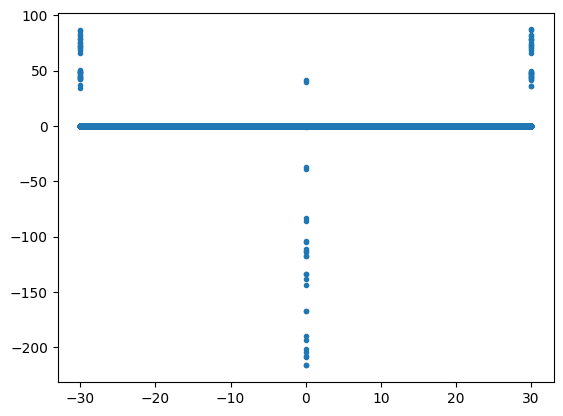

In [5]:
plt.plot(data["x"], data["F3"],".")

In [6]:
F3 = data["F3"][data["x"]< data["x"].mean()]
P = -2*F3.sum()
B = 25
L = 60
tn  = 2.934
tl = 0.475
t = tn + 4*tl
U = 5

In [7]:

Eflex = (P*L**3)/(4*U*B*t**3) * 1e-3

In [8]:
print("Eflex = ", Eflex)

Eflex =  -13.283020791709843


In [9]:
import numpy as np
# cilindro
Ly = 25
Lx = 60
tn  = 2.934
tl = 0.475
r  = 3*tl/8
d_Y  = 0.74297
d_X  = 0.55872
d_SX = 0.5895
d_SY = 0.78042

A = np.pi*r**2



R = 10/6
nx_fibres = 6

lx = 10

z0 = tn/2
dx = 0.1 
dz = 0.1


hx = R
hz = tl

In [10]:

Lz = 2*2*hz + 2*z0 

yspan = np.arange(-Ly/2, Ly/2, hx)
yspan = yspan + hx/2

xspan = hx/2 + hx*np.arange(0, nx_fibres, 1)

FP1_list = []
FM1_list = []
FP2_list = []
FM2_list = []

trajs_Y = []
for iy in yspan:
    
    # x in [ 0, nx_fibres*hx]
    xspan_loop = np.linspace(-0.325*lx, 0.325*lx, 25)
    yspan_loop = np.zeros_like(xspan_loop) + iy
    zspan_loop = np.zeros_like(xspan_loop) - z0 - hz/2
    itraj = np.array([xspan_loop, yspan_loop, zspan_loop]).T
    trajs_Y.append(itraj)

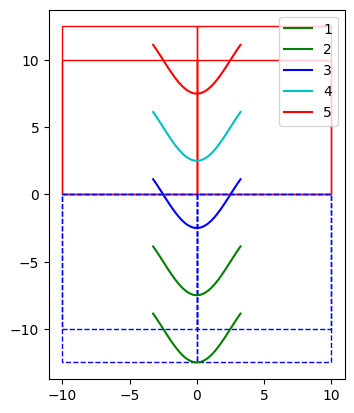

In [11]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 25)

# =============================================================================
def fparams(t,y0):
    y = 0.65*lx*(t - 1/2) 
    x = -R*np.cos(2*np.pi*y/T) + y0
    return y,x

x1,y1 = fparams(t1,-4*R)
plt.plot(x1,y1, 'g',label="1")  

x2,y2 = fparams(t1,-2*R)
plt.plot(x2,y2, 'g',label="2")  

x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")

x4,y4 = fparams(t1,2*R)
plt.plot(x4,y4, 'c',label="4")


x5 = 0.65*lx*(t1 - 1/2) 
y5 = -R*np.cos(2*np.pi*x5/T) + 4*R
# x5,y5 = fparams(t1,4*R)
plt.plot(x5,y5, 'r',label="5")


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [12]:
z = - z0 - 5*hz/2
zspan = np.zeros_like(x3) + z
trajs_mid = [ 
            [x1,y1,zspan],
            [x2,y2,zspan],
            [x3,y3,zspan],
            [x4,y4,zspan],
            [x5,y5,zspan] ]

trajs_SX = [ np.array(traj).T for traj in trajs_mid]

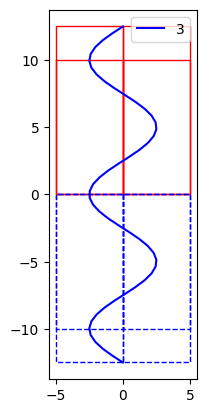

In [13]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)


rectangle(0,   0,  lx/2,  10  , 'red')
rectangle(0,   0, -lx/2,  10  , 'red')
rectangle(0,   0,  lx/2, 12.5 , 'red')
rectangle(0,   0, -lx/2, 12.5 , 'red')



rectangle(0,   0,  lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx/2, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx/2, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 50)

# =============================================================================
def fparams(t,y0):
    y = 2*12.5*t-12.5
    x = -R*np.cos(2*np.pi*y/T) + y0
    return x,y


x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")

# =============================================================================

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [14]:
z = - z0 - 3*hz/2
zspan = np.zeros_like(x3) + z
trajs_mid = [
            [x3,y3,zspan] ]

trajs_SY = [ np.array(traj).T for traj in trajs_mid]

/tmp/ipykernel_3508043/2903309620.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(itraj[1:,0],


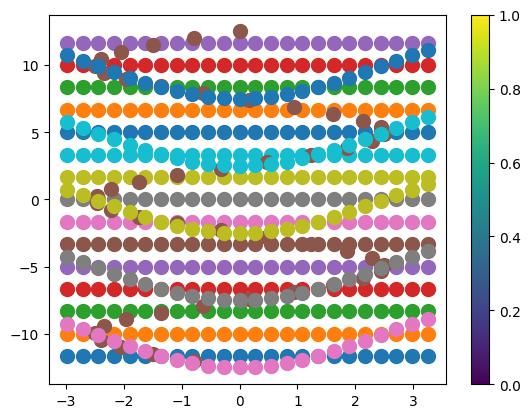

In [15]:
for itraj in [*trajs_Y, *trajs_SY, *trajs_SX]:
    plt.scatter(itraj[1:,0],
                itraj[1:,1], s=100, cmap='viridis',vmax=1000,vmin=0)
    
plt.colorbar()

In [16]:
from scipy.interpolate import NearestNDInterpolator
from gmshtools.grid_section import grid_section


def compute_P1_max(data,idesign,d):

    x = data["x"]
    y = data["y"]
    z = data["z"]
    P1 = data["P1"]

    fcn = NearestNDInterpolator((x,y,z),P1)


    P1_mu_list = []
    P1_all = []
    P1_all_mesh = []
    for jj,jtrajs in enumerate(idesign):

        jtraj_diff = np.diff(jtrajs,axis=0)
        P1_mu_list_by = []
        P1_mesh = []
        for j in range(0,len(jtraj_diff),1):

            vec_z =  jtraj_diff[j]
            vec_z = vec_z/np.linalg.norm(vec_z)
            vec_x = np.cross(vec_z, [0,0,1])
            vec_x = vec_x/np.linalg.norm(vec_x)

            X,Y,Z = grid_section(jtrajs[j][0],
                                jtrajs[j][1],
                                jtrajs[j][2],
                                vec_z,
                                vec_x,
                                1.2*d,
                                1.2*r,
                                rho=50)
            P1 = fcn(X,Y,Z)
            P1_mu = np.mean(P1)
            P1_mu_list_by.append(P1_mu)
            P1_mu_list.append(P1_mu)
            P1_mesh.append({
                "X": X,
                "Y": Y,
                "Z": Z,
                "P1": P1
            })
        # ============================
        P1_all.append(np.array(P1_mu_list_by))
        P1_all_mesh.append(P1_mesh)
        # ============================
    P1_max = np.max(P1_mu_list)
    P1_all = np.array(P1_all)
    return P1_max,P1_all, P1_all_mesh

In [17]:
P1_max_Y,P1_all_Y,P1_all_Y_mesh = compute_P1_max(ifrd["data_blocks"][0],trajs_Y, d_Y)
P1_max_SY,P1_all_SY,P1_all_SY_mesh = compute_P1_max(ifrd["data_blocks"][0],trajs_SY, d_SY)
P1_max_SX,P1_all_SX,P1_all_SX_mesh = compute_P1_max(ifrd["data_blocks"][0],trajs_SX, d_SX)

24
24
24
24
24
24
24
24
24
24
24
24
24
24
24


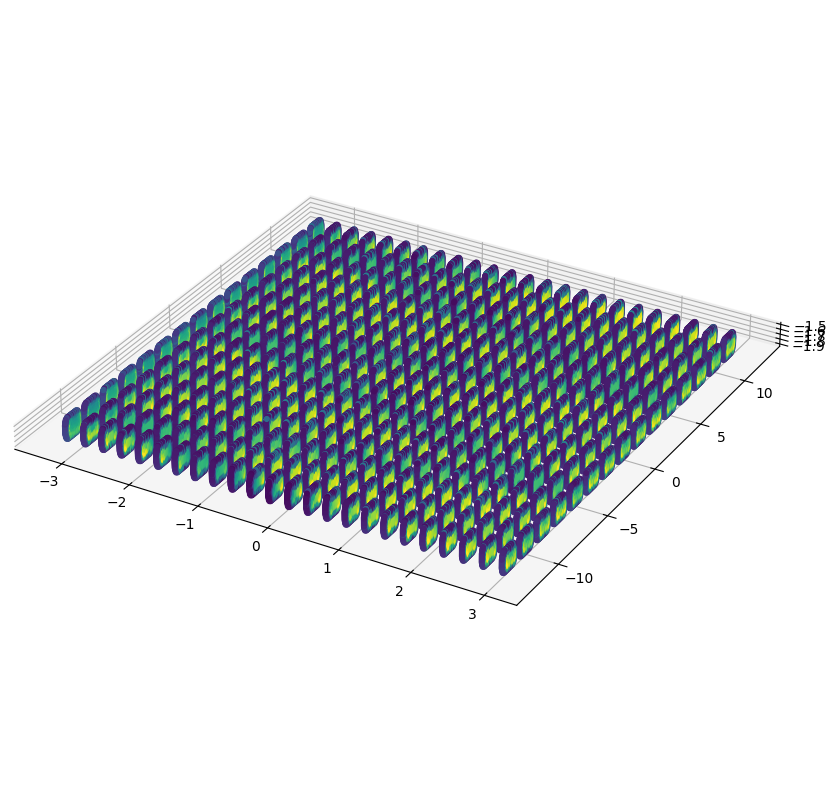

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 
# x y z 
for imesh in P1_all_Y_mesh:
    print(len(imesh))
    for ii in range(len(imesh)):
        ax.scatter(imesh[ii]["X"],
                   imesh[ii]["Y"],
                   imesh[ii]["Z"],
                   c=imesh[ii]["P1"],
                   s=10, cmap='viridis',vmax=1000,vmin=0)

# aspect ratio
ax.set_box_aspect([1,1,0.05])  # aspect ratio is 1:1:1

49


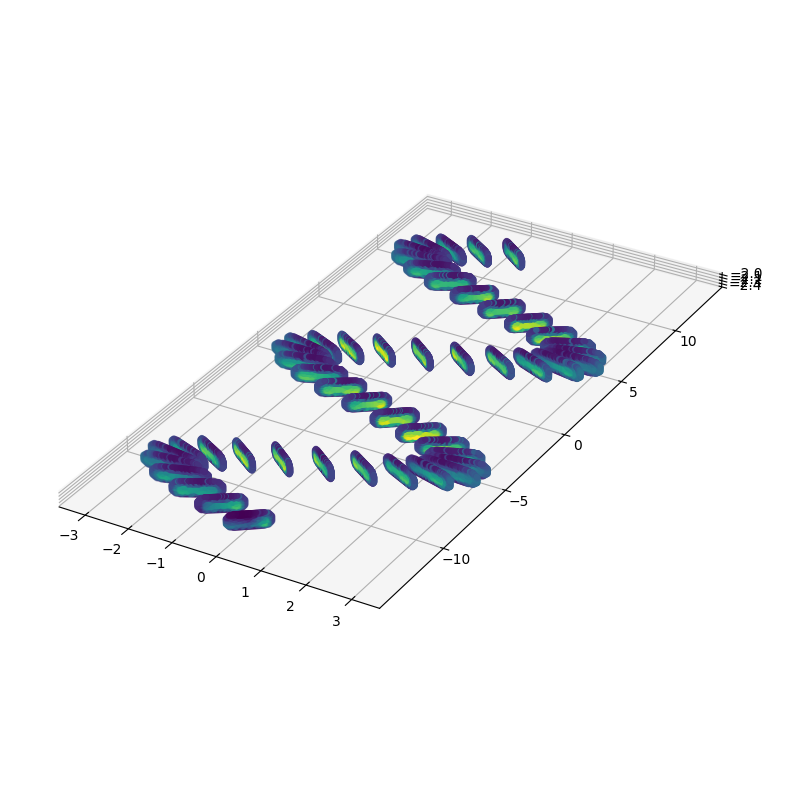

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 
# x y z 
for imesh in P1_all_SY_mesh:
    print(len(imesh))
    for ii in range(len(imesh)):
        ax.scatter(imesh[ii]["X"],
                   imesh[ii]["Y"],
                   imesh[ii]["Z"],
                   c=imesh[ii]["P1"],
                   s=10, cmap='viridis',vmax=1000,vmin=0)

# aspect ratio
ax.set_box_aspect([1,2,0.05])  # aspect ratio is 1:1:1

24
24
24
24
24


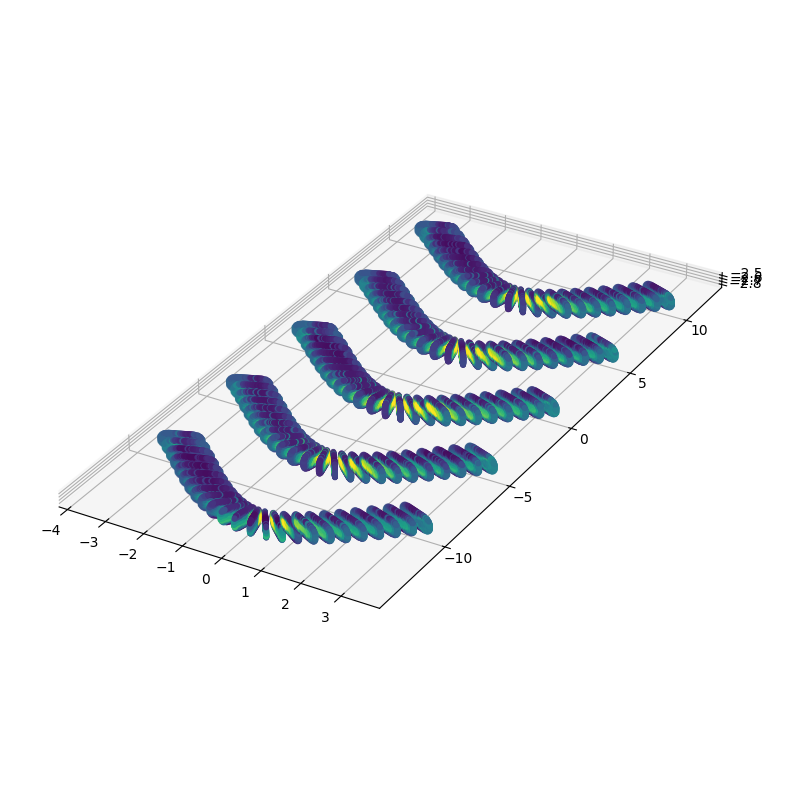

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 
# x y z 
for imesh in P1_all_SX_mesh:
    print(len(imesh))
    for ii in range(len(imesh)):
        ax.scatter(imesh[ii]["X"],
                   imesh[ii]["Y"],
                   imesh[ii]["Z"],
                   c=imesh[ii]["P1"],
                   s=10, cmap='viridis',vmax=1000,vmin=0)

# aspect ratio
ax.set_box_aspect([1,2,0.05])  # aspect ratio is 1:1:1

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


/tmp/ipykernel_3508043/2960552730.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(data_cp["z"],data_cp["y"], s=0.1, cmap='viridis',vmax=1000,vmin=0)


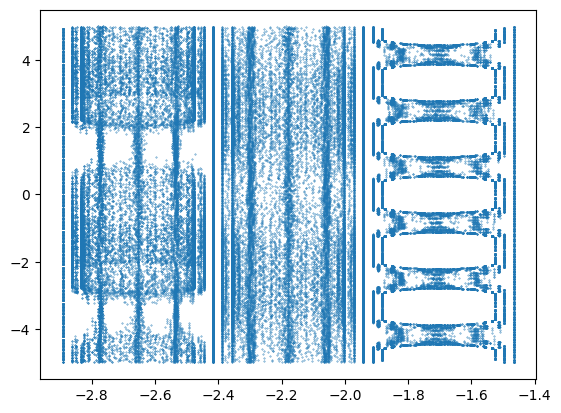

In [21]:
from djccx.inp.inp import inp
from djccx.frd.readfrd import readfrd
import numpy as np
from matplotlib import pyplot as plt
inp_f = inp("output/main.inp")
ifrd = readfrd("output/main.frd")
RESINA = inp_f.select("RESINA","elset")
df = RESINA.GetUniqueNodes(inp_f)
indx_frd = df.index.values

nodes_matrix = ifrd["data_blocks"][0].loc[indx_frd]
data_cp = nodes_matrix.copy()
data_cp = data_cp[(data_cp["x"] > -2.5) & (data_cp["x"] < 2.5)]
# y in -5, 5
data_cp = data_cp[(data_cp["y"] > -5) & (data_cp["y"] < 5)]
id_max = np.argmax(data_cp["P1"])

P1_max = data_cp["P1"].iloc[id_max]
x_max = data_cp["x"].iloc[id_max]
y_max = data_cp["y"].iloc[id_max]
z_max = data_cp["z"].iloc[id_max]

dist = np.sqrt((x_max - nodes_matrix["x"])**2 + \
                (y_max - nodes_matrix["y"])**2 + \
                (z_max - nodes_matrix["z"])**2)
        
nodes_matrix = nodes_matrix[dist < 0.025]
P1_max_resina = np.mean(nodes_matrix["P1"])
# plot xz view scatter 
# P1_max_resina = P1_max
plt.scatter(data_cp["z"],data_cp["y"], s=0.1, cmap='viridis',vmax=1000,vmin=0)
# ratio 


In [22]:
P1_max_resina_list = []
rr_list = np.linspace(0.001, 0.3, 15)
for rr in rr_list:
    nodes_matrix = ifrd["data_blocks"][0].loc[indx_frd]
    dist = np.sqrt((x_max - nodes_matrix["x"])**2 + \
                    (y_max - nodes_matrix["y"])**2 + \
                    (z_max - nodes_matrix["z"])**2)
    nodes_matrix = nodes_matrix[dist < rr]
    P1_max_resina_loop = np.mean(nodes_matrix["P1"])
    P1_max_resina_list.append(P1_max_resina_loop)

In [23]:
from loadsavejson.savejson import savejson

savejson({
    "P1_max_Y": P1_max_Y,
    "P1_max_SY": P1_max_SY,
    "P1_max_SX": P1_max_SX,
    "P1_all_Y": P1_all_Y.tolist(),
    "P1_all_SY": P1_all_SY.tolist(),
    "P1_all_SX": P1_all_SX.tolist(),
    "Eflex": Eflex,
    "P1_max" : np.max([P1_max_Y,P1_max_SY,P1_max_SX]),
    "P1_max_resina": P1_max_resina,
    "position": [x_max,y_max,z_max],
    "P1_max_resina_list": P1_max_resina_list,
    "rr_list": rr_list.tolist(),
    "rrr": 0.05
},"P1.json")